# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [85]:
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [13]:
apple = pd.read_csv('appl_1980_2014.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [14]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [19]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [21]:
apple.set_index('Date', inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [23]:
# Solution 1
apple.index.nunique()!=apple.index.shape[0]

False

In [161]:
# Solution 2
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [164]:
apple.sort_index(inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close,cat_vol
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,mid high
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,mid low
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,low
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,low
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,low


### Step 9. Get the last business day of each month

In [82]:
last_BD_Month = apple.resample('BM').last()
last_BD_Month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
1981-05-29,33.13,33.25,33.13,33.13,14845600,0.52
1981-06-30,26.13,26.13,26.00,26.00,8976800,0.41
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39
1981-08-31,20.13,20.25,20.13,20.13,10236800,0.31


### Step 10.  What is the difference in days between the first day and the oldest

In [49]:
(apple.index[0]-apple.index[-1]).days

-12261

### Step 11.  How many months in the data we have?

In [84]:
len(apple.groupby(apple.index.to_period('M')).size())

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

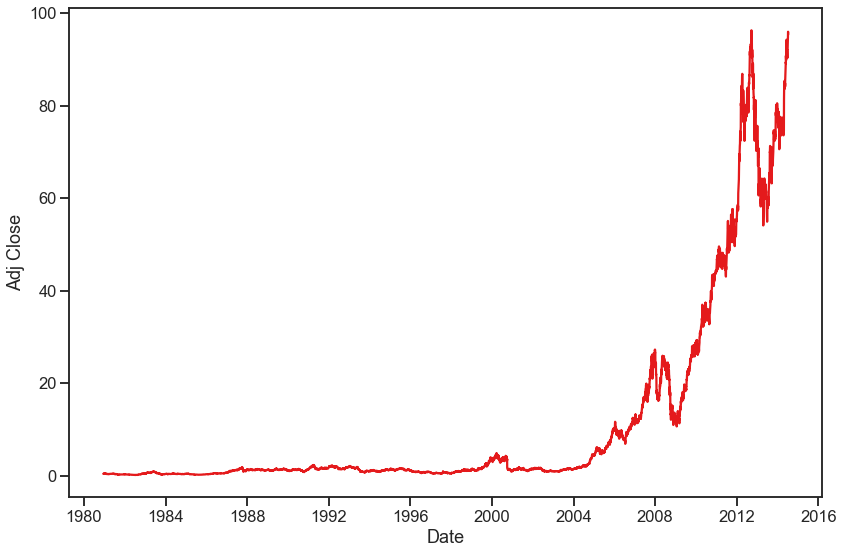

In [92]:
sns.set(context='talk', style='ticks', palette='Set1')
sns.lineplot(x=apple.index, y=apple['Adj Close'])
fig = plt.gcf()
fig.set_facecolor('w')
fig.set_size_inches(13.5, 9)
plt.show()

### BONUS: Create your own question and answer it.

In [ ]:
import plotly.express as px

In [153]:
ser = pd.qcut(apple['Volume'], q=[0,0.25,0.5,0.75,1], labels=['low', 'mid low', 'mid high', 'high'])
ser.shape, apple.shape

((8465,), (8465, 7))

In [154]:
ser[ser.isna()]

Series([], Name: Volume, dtype: category
Categories (4, object): [low < mid low < mid high < high])

In [158]:
apple.insert(6,'cat_vol',ser)

In [159]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,cat_vol
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,mid high
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,mid low
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,low
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,low
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,low


In [160]:
# With plotly ?

fig = px.line(apple.reset_index(), x='Date',y='Adj Close', color='cat_vol')
fig.show()